# **Group proposal: Heart Disease Diagnostic Tool**

### Introduction: 

Cardiovascular diseases are the leading cause of death globally, estimated to take around 17.9 million lives each year. It is a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. For our project, the question we are trying to answer is:

“Can **age, cholesterol levels, and max heartrate** be used to predict whether a patient has heart disease?”

The dataset used to answer this questions was built using patient information from Cleveland and was processed to include 14 out of 76 attributes most commonly used by published experiments. 

The data set used in this project contains patient information from 303 patients in Cleveland and was obtained from https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data. This data was then processed to only contain 14 key attributes from 303 patients.

The 14 attributes are:
* `age` - represented in years - numerical
* `sex` - 1 representing male; 0 representing female - categorical
* `cp` -  Chest pain type - categorical
    - Value 1 = typical angina
    - Value 2 = atypical angina
    - Value 3 = non-anginal pain
    - Value 4 = asymptomatic
* `trestbps` - resting blood pressure (mmHg) - numerical
* `chol` - serum cholesterol (mg/dl) - numerical
* `fbs` - fasting blood sugar > 120 mg/dl (1 = true; 0 = false) - categorical
* `restecg` - resulting electrocardiographic results - categorical
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
* `thalach` - maximum heart rate achieved - numerical
* `exang` - exercise induced angina - categorical
    - 1 = yes
    - 0 = no
* `oldpeak` - ST depression induced by exercise relative to rest - numerical
*  `slope` - slope of peak exercise ST segment - categorical
    - Value 1: upsloping = 3
    - Value 2: flat = 2
    - Value 3: downsloping = 1
* `ca` - number of major vessels (0, 1, 2, 3) 
* `thal` - Thalassemia Severity
    - Value 3 = normal
    - Value 6 = fixed defect
    - Value 7 = reversible defect
* `diagnosis` - diagnosis of heart disease
    - Positive or Negative



## **Preliminary exploratory data analysis:**

In [1]:
library(rvest)
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fi

### **Reading and Wrangling the Data**

In [2]:
set.seed(293)

dataset_test <- download.file(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", 
    "heart_disease.csv")

heart_data <- read_csv("heart_disease.csv", col_names = FALSE)


heart_data <- rename(heart_data, 
                     age =X1,
                     sex =X2,
                     cp =X3,
                     trestbps =X4,
                     chol = X5,
                     fbs =X6,
                     restecg=X7,
                     thalach=X8,
                     exang=X9,
                     oldpeak=X10,
                     slope=X11,
                     ca=X12,
                     thal=X13,
                     diagnosis=X14)

idx <- heart_data == "?"
is.na(heart_data) <- idx                                 #eliminates ? and replaces with NA

heart_data[] <- sapply(heart_data, as.numeric) #converts all the data to numeric

names = c('sex', 'cp', 'exang', 'slope', 'thal', 'diagnosis', "restecg", "ca", "fbs") #unsure if ca is a factor
heart_data[,names] <- lapply(heart_data[,names] , factor)

heart_data <- mutate(heart_data, diagnosis = ifelse(diagnosis == "1"|diagnosis == "2"|diagnosis == "3"|diagnosis == "4", "Positive", "Negative"))
heart_data <- mutate(heart_data, diagnosis = as.factor(diagnosis))          #changes the diagnosis values to strings

heart_data


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,Negative
67,1,4,160,286,0,2,108,1,1.5,2,3,3,Positive
67,1,4,120,229,0,2,129,1,2.6,2,2,7,Positive
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,Positive
57,0,2,130,236,0,2,174,0,0.0,2,1,3,Positive
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,Negative


### **Splitting data into training and testing sets**

In [3]:
heart_split <- initial_split(heart_data, prop = 0.75, strata = diagnosis)          #splits data
heart_train <- training(heart_split)
heart_test <- testing(heart_split) 

We split the dataset in order to test the accuracy of our diagnosis tool later.

### **Number of Positive and Negative diagnoses**

In [4]:
count_train_summary <- group_by(heart_train, diagnosis) |>
    summarize(count=n())
count_train_summary

diagnosis,count
<fct>,<int>
Negative,123
Positive,104


From the training dataset we can see theres a good representation of patients with and without heart disease which is good, as later on we will know if our diagnosis tool is actually making accurate predictions instead of alwasy predicting postive/negative.

### **Number of missing values in each column**

In [6]:
heart_train |>
    summarise_all(funs(sum(is.na(.))))
heart_test |>
    summarise_all(funs(sum(is.na(.))))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,3,0,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,1,2,0


The only attributes with missing data are `ca` and `thal`.

### **Average of numerical columns**

In [5]:
stats_avg <- heart_train |>
    select(age, trestbps, chol, thalach, oldpeak, diagnosis) |>
    group_by(diagnosis) |>
    summarize(across(age:oldpeak, mean, na.rm = TRUE))

stats_avg

diagnosis,age,trestbps,chol,thalach,oldpeak
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,51.82114,128.3008,237.8862,158.9675,0.5699187
Positive,56.58654,132.1442,250.1635,139.1250,1.5788462


From this table we can see that on average patients with higher age, resting heart rate, cholesterol levels, ST depression induced by exercise, and lower maximum heart rate are more likely to be diagnosed with some form of heart disease.

### **Visualizations of Predictor Variables**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



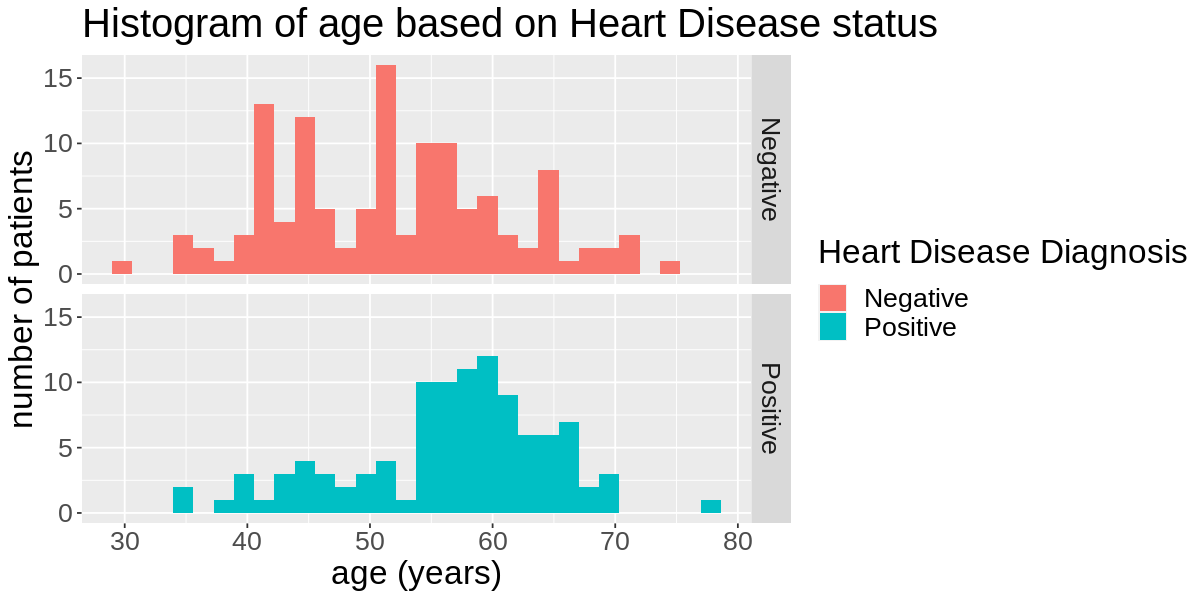

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



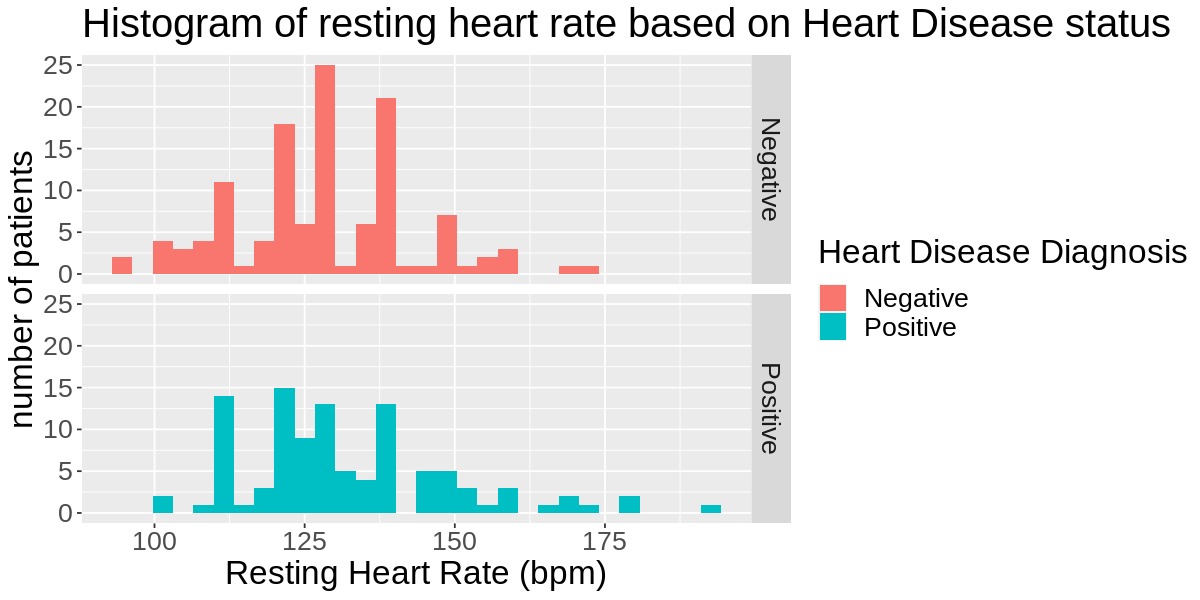

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



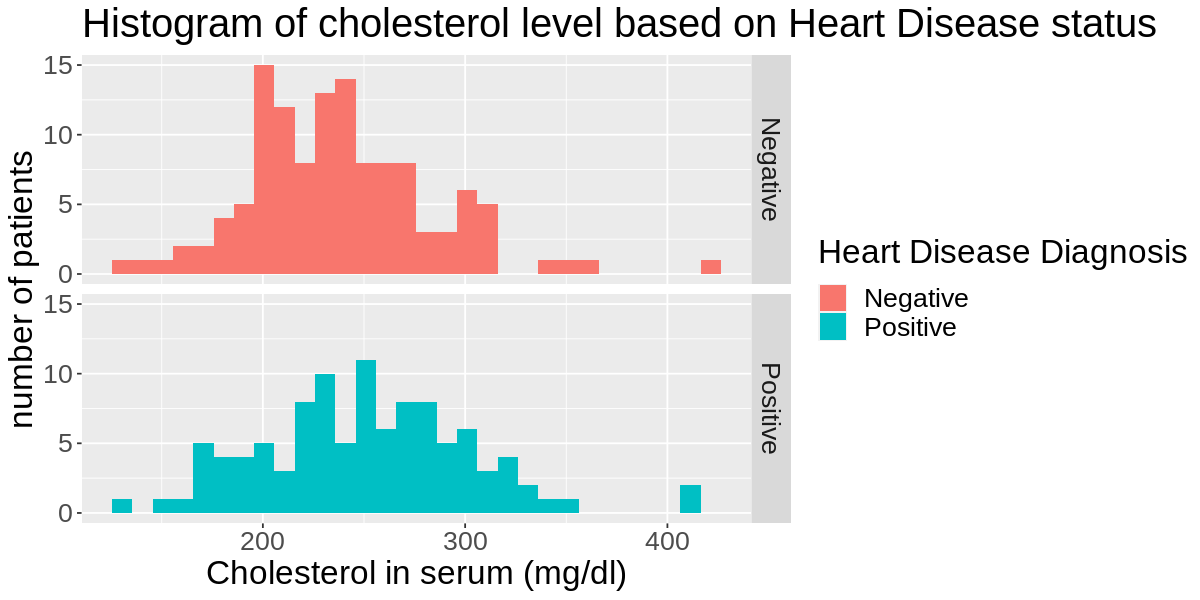

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



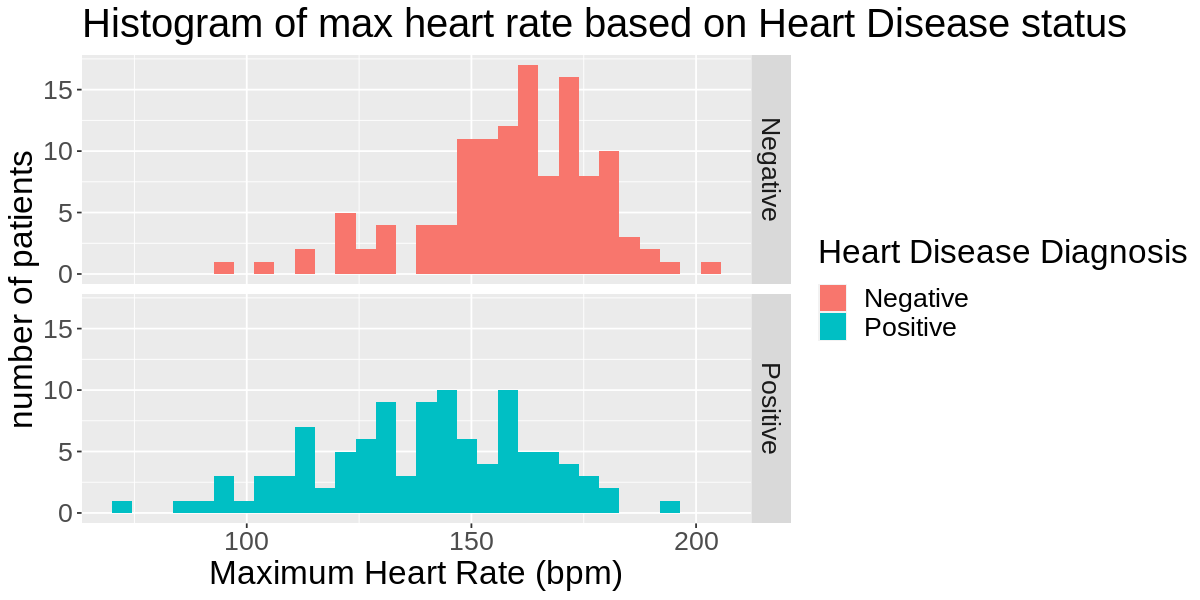

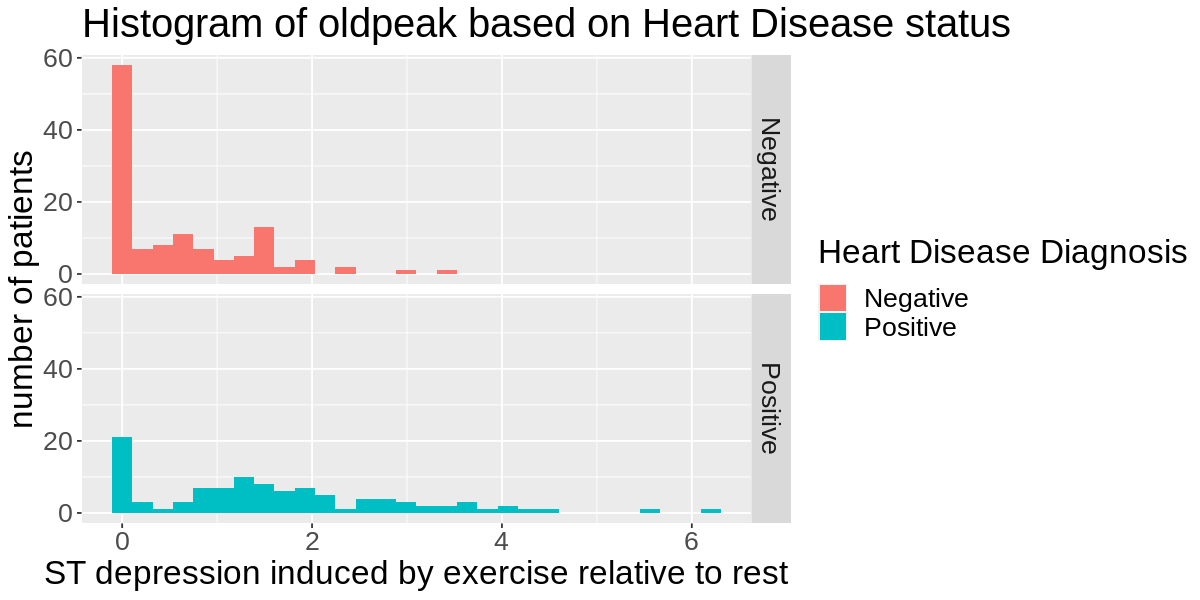

In [16]:
options(repr.plot.height = 5, repr.plot.width = 10)

age_plot <- heart_train |>
        ggplot(aes(x = age, fill = diagnosis)) +
        geom_histogram() +
        labs(x = "age (years)", y = "number of patients", fill = "Heart Disease Diagnosis") + 
        ggtitle("Histogram of age based on Heart Disease status") +
        theme(text = element_text(size = 20)) +
        facet_grid(rows = vars(diagnosis))
age_plot

trestbps_plot <- heart_train |>
        ggplot(aes(x = trestbps, fill = diagnosis)) +
        geom_histogram() +
        labs(x = "Resting Heart Rate (bpm)", y = "number of patients", fill = "Heart Disease Diagnosis") + 
        ggtitle("Histogram of resting heart rate based on Heart Disease status") +
        theme(text = element_text(size = 20)) +
        facet_grid(rows = vars(diagnosis))
trestbps_plot

chol_plot <- heart_train |>
        ggplot(aes(x = chol, fill = diagnosis)) +
        geom_histogram() +
        labs(x = "Cholesterol in serum (mg/dl)", y = "number of patients", fill = "Heart Disease Diagnosis") + 
        ggtitle("Histogram of cholesterol level based on Heart Disease status") +
        theme(text = element_text(size = 20)) +
        facet_grid(rows = vars(diagnosis))
chol_plot

thalach_plot <- heart_train |>
        ggplot(aes(x = thalach, fill = diagnosis)) +
        geom_histogram() +
        labs(x = "Maximum Heart Rate (bpm)", y = "number of patients", fill = "Heart Disease Diagnosis") + 
        ggtitle("Histogram of max heart rate based on Heart Disease status") +
        theme(text = element_text(size = 20)) +
        facet_grid(rows = vars(diagnosis))
thalach_plot

oldpeak_plot <- heart_train |>
        ggplot(aes(x = oldpeak, fill = diagnosis)) +
        geom_histogram() +
        labs(x = "ST depression induced by exercise relative to rest", y = "number of patients", fill = "Heart Disease Diagnosis") + 
        ggtitle("Histogram of oldpeak based on Heart Disease status") +
        theme(text = element_text(size = 20)) +
        facet_grid(rows = vars(diagnosis))
oldpeak_plot



# age_thalach_plot <- heart_train |>
#     ggplot(aes(x=age, y=thalach, color= diagnosis))+
#     geom_point()+
#     labs(x="Age", y="Maximum Heart Rate (bpm)", color="Heart Disease Diagnosis") +
#     theme(text = element_text(size = 15)) +
#     ggtitle("Plot 1")
# age_thalach_plot



# age_chol_plot <- heart_train |>
#     ggplot(aes(x=age, y=chol, color= diagnosis))+
#     geom_point()+
#     labs(x="Age", y="Cholesterol in serum (mg/dl)", color="Heart Disease Diagnosis") +
#     theme(text = element_text(size = 15)) +
#     ggtitle("Plot 2")
# age_chol_plot

# age_oldpeak_plot <- heart_train |>
#     ggplot(aes(x=age, y=oldpeak, color= diagnosis))+
#     geom_point()+
#     labs(x="Age", y="Oldpeak", color="Heart Disease Diagnosis") +
#     theme(text = element_text(size = 15)) +
#     ggtitle("Plot 3")
# age_oldpeak_plot

# chol_thalach_plot <- heart_train |>
#     ggplot(aes(x=chol, y=thalach, color= diagnosis))+
#     geom_point()+
#     labs(x="Cholesterol in serum (mg/dl)", y="Maximum Heart Rate (bpm)", color="Heart Disease Diagnosis") +
#     theme(text = element_text(size = 15)) +
#     ggtitle("Plot 4")
# chol_thalach_plot

# chol_oldpeak_plot <- heart_train |>
#     ggplot(aes(x=chol, y=oldpeak, color= diagnosis))+
#     geom_point()+
#     labs(x="Cholesterol in serum (mg/dl)", y="Oldpeak", color="Heart Disease Diagnosis") +
#     theme(text = element_text(size = 15)) +
#     ggtitle("Plot 5")
# chol_oldpeak_plot

# oldpeak_thalach_plot <- heart_train |>
#     ggplot(aes(x=thalach, y=oldpeak, color= diagnosis))+
#     geom_point()+
#     labs(x="Maximum Heart Rate (bpm)", y="Oldpeak", color="Heart Disease Diagnosis") +
#     theme(text = element_text(size = 15)) +
#     ggtitle("Plot 6")
# oldpeak_thalach_plot


Looking at these graphs, we can clearly see a trend 

### Methods

We decided to not choose categorical variables as our predictors because our goal is to classify observations by finding the K nearest neighbors, which would work better on numerical predictors. From there, we chose four variables with the most significant difference from our table that compares average values for positive and negative diagnoses and plotted them against each other to see if we could narrow our number of predictors. We saw that oldpeak values for many observations was zero, causing lots of overlap, so we narrowed our predictors to age, serum cholesterol, and maximum heart rate (thalach). Looking at the three graphs each plotting two of age, serum cholesterol and thalach against each other, we decided that age and thalach are the best variables to use in our model because the graph for age versus thalach shows a pattern where there are regions of positive and negative heart disease diagnosis. For the other two graphs plotting age and serum cholesterol, and serum cholesterol and thalach, there is not as much of a clear pattern and data points for positive and negative diagnosis are interspersed in one another.

After we complete the K nearest neighbors, we can visualize the results of predicted diagnoses by creating a bar graph from a confusion matrix, which would compare the number of accurate predictions with inaccurate predictions. 



### Expected Outcomes and Significance

For the outcome of the experiment, we expect to find that the attributes, [attributes], are able to accurately predict heart disease under a K nearest neighbour model. The goal is for this classification model to be accurate enough to predict/diagnose heart disease in a new patient given only information about [attributes].  If we are able to show that certain attributes are correlated to heart disease, this will impact the diagnosis of heart diseases and potentially lead to development of new preventative measures against heart disease. A future question this project leads to is if a selection of other attributes can be used to predict heart disease more accurately than our present selection of different attributes. Another question is if our selection of attributes that is used to predict heart disease can be used for prediction of other cardiovascular diseases. 